#VGG19_transfer


##Download Data

In [1]:
!cp -r "/content/drive/MyDrive/splitted" /content/


##PreProcessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_source = "/content/splitted"

img_size = (224, 224)
batch_size = 32
num_classes = 10

train_data = os.path.join(data_source, "train")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3356 images belonging to 10 classes.
Found 834 images belonging to 10 classes.


##Train

In [3]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models

base = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base.trainable = False  # freeze pretrained layers

x = layers.Flatten()(base.output)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation="softmax")(x)

model_vgg19 = models.Model(inputs=base.input, outputs=output)

model_vgg19.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model_vgg19.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 86s 676ms/step - accuracy: 0.2949 - loss: 2.9086 - val_accuracy: 0.7758 - val_loss: 0.9784
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 57s 540ms/step - accuracy: 0.6275 - loss: 1.0899 - val_accuracy: 0.8969 - val_loss: 0.5673
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 530ms/step - accuracy: 0.6900 - loss: 0.8702 - val_accuracy: 0.8789 - val_loss: 0.4648
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 530ms/step - accuracy: 0.7480 - loss: 0.7160 - val_accuracy: 0.9161 - val_loss: 0.3691
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 532ms/step - accuracy: 0.7651 - loss: 0.6383 - val_accuracy: 0.9472 - val_loss: 0.2714
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 533ms/step - accuracy: 0.7882 - loss: 0.5673 - val_accuracy: 0.9484 - val_loss: 0.2666
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 531ms/step - accuracy: 0.7866 - loss: 0.5402 - val_accuracy: 0.9269 - val_loss: 0.2732
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 531ms/step - accuracy: 0.7859 - loss: 0

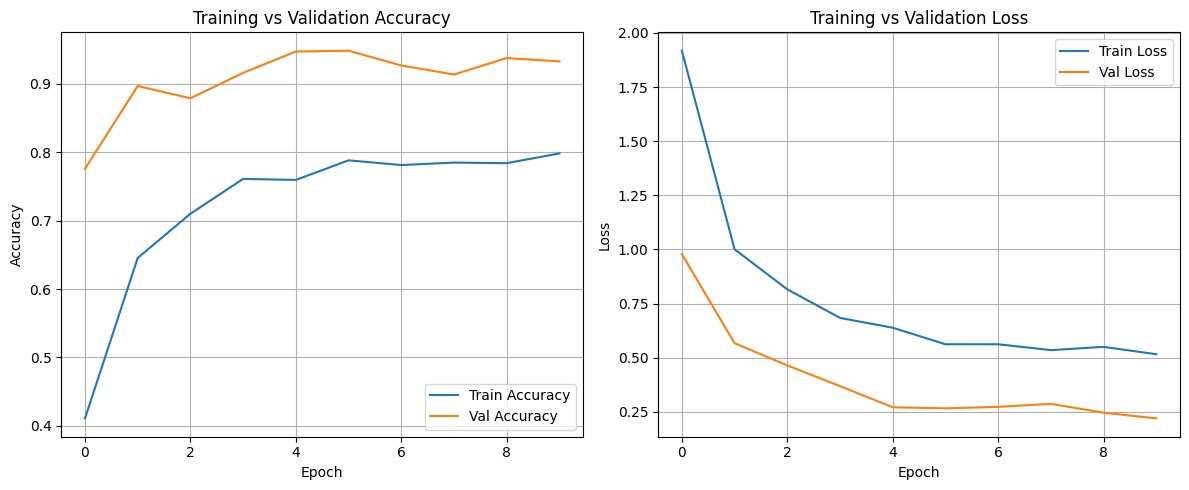

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##Evaluation and visualization



In [5]:
test_data = os.path.join(data_source, "test")

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 1053 images belonging to 10 classes.


In [6]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

test_gen.reset()

y_test_prob = model_vgg19.predict(test_gen, verbose=1)
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())
num_classes = len(class_names)

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(
    y_test_true,
    y_test_pred,
    target_names=class_names,
    digits=4
))


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 527ms/step
Test Accuracy: 0.9867046533713201

Test Classification Report:
                 precision    recall  f1-score   support

        call_me     1.0000    0.9811    0.9905       106
fingers_crossed     0.9902    1.0000    0.9951       101
           okay     0.9907    0.9907    0.9907       108
          paper     1.0000    0.9630    0.9811       108
          peace     0.9810    0.9717    0.9763       106
           rock     1.0000    0.9902    0.9951       102
        rock_on     1.0000    0.9907    0.9953       107
        scissor     0.9459    0.9906    0.9677       106
         thumbs     0.9643    1.0000    0.9818       108
             up     1.0000    0.9901    0.9950       101

       accuracy                         0.9867      1053
      macro avg     0.9872    0.9868    0.9869      1053
   weighted avg     0.9871    0.9867    0.9868      1053



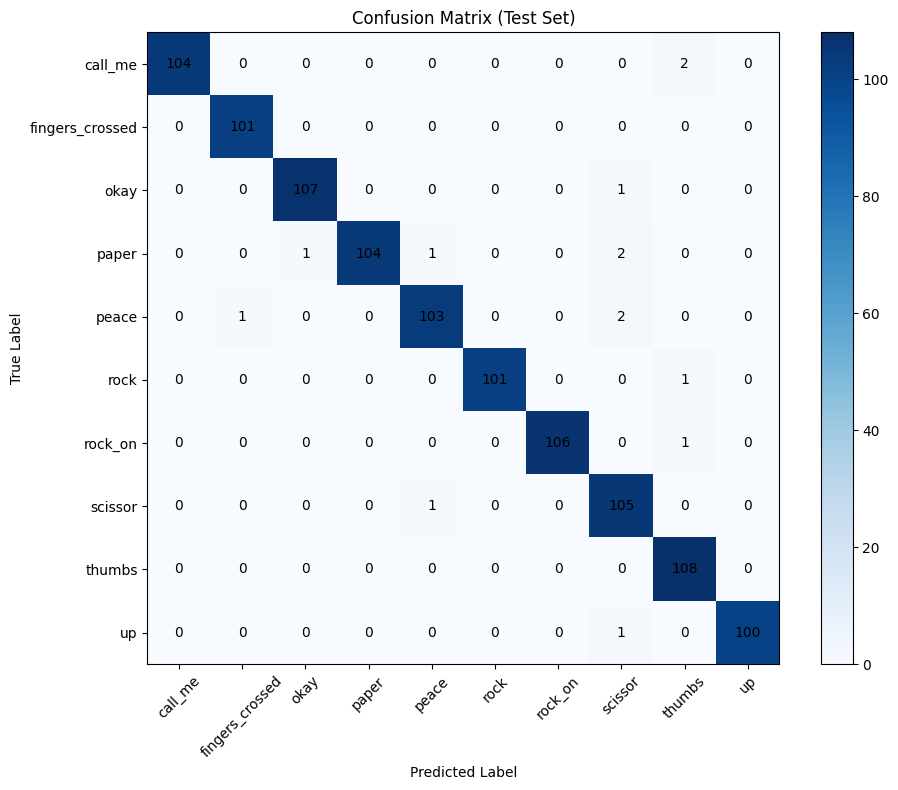

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


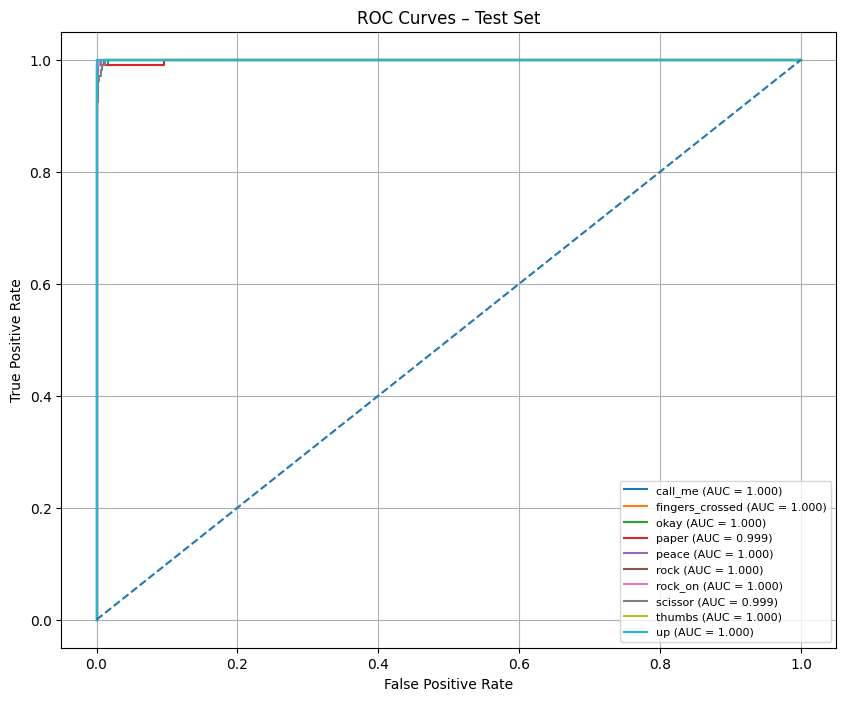

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Test Set")
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.show()


##save

In [10]:
model_vgg19.save("/content/drive/MyDrive/DL_Colabs/final models/VGG19_transfer.keras")